What is RNN?

Recurrent Neural Networks

Theory:
Traditional Neural Networks cant remember the context. Thats why they are independent.
-> Not Suitable for speeches, sentences, stock_prices

RNNs are suitable for handling such kind of data, it uses a hidden state that carries past information.
RNNs reads input one timestep at a time.

Key Concepts:
1. Hidden State: Memory of previous timestamp
2. Vanishing Gradient Problem: Cannot remember long term dependencies

LSTM and GRU were invented due to the need of RNN.
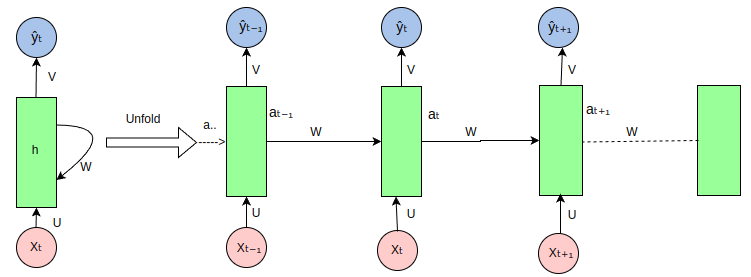

In [1]:
import pandas as pd
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

/Users/ssharma/Desktop/python_tutorial/data_science/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower()

In [3]:
df = pd.read_csv("IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['review'] = df['review'].apply(clean_text)

In [6]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [10]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [11]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production br br the filmin...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically theres a family where a little boy j...,0
4,petter matteis love in the time of money is a ...,1


In [12]:
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['review'])

In [13]:
sequences = tokenizer.texts_to_sequences(df['review'])

In [15]:
padded = pad_sequences(sequences, maxlen=200, padding='post')
padded

array([[  1,   1,  21, ..., 123,   1, 498],
       [  4, 384, 116, ...,   0,   0,   0],
       [ 10, 197,  11, ...,   0,   0,   0],
       ...,
       [  1,   4,  50, ...,   1,   3,   1],
       [498,  16,   1, ...,  69, 707,  43],
       [ 56,  29,   1, ...,   0,   0,   0]], dtype=int32)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, df['sentiment'], test_size=0.2, random_state=44)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

In [24]:
model = Sequential([
    Embedding(10000, 64, input_length=200),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [25]:
y_train.shape

(40000,)

In [26]:
history = model.fit(
    X_train,
    y_train,
    epochs=3,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/3


2025-12-11 18:07:05.334254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - accuracy: 0.5182 - loss: 0.6942 - val_accuracy: 0.5437 - val_loss: 0.6864
Epoch 2/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.5890 - loss: 0.6612 - val_accuracy: 0.6369 - val_loss: 0.6791
Epoch 3/3
250/250 ━━━━━━━━━━━━━━━━━━━━ 15s 58ms/step - accuracy: 0.6734 - loss: 0.6261 - val_accuracy: 0.6674 - val_loss: 0.6017


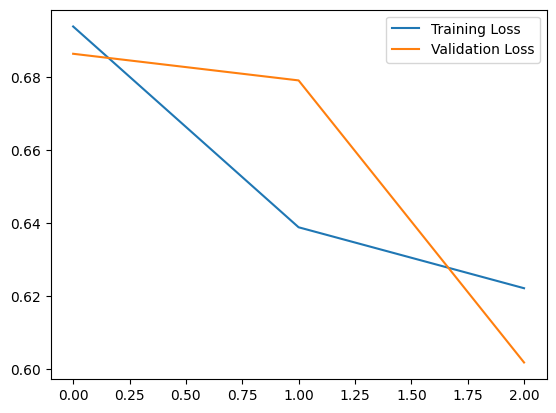

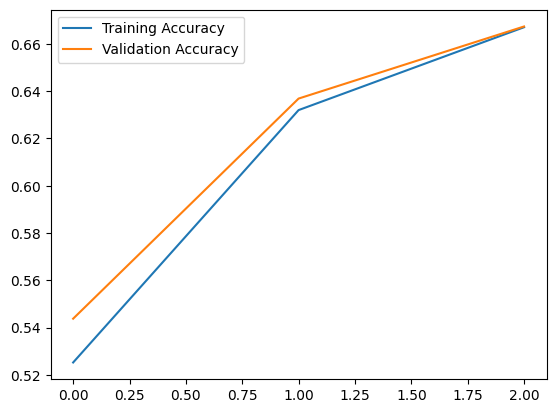

In [27]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.show()

In [36]:
text = df.iloc[49995, :]['review']
text

'i thought this movie did a down right good job it wasnt as creative or original as the first but who was expecting it to be it was a whole lotta fun the more i think about it the more i like it and when it comes out on dvd im going to pay the money for it very proudly every last cent sharon stone is great she always is even if her movie is horriblecatwoman but this movie isnt this is one of those movies that will be underrated for its lifetime and it will probably become a classic in like  yrs dont wait for it to be a classic watch it now and enjoy it dont expect a masterpiece or something thats gripping and soul touching just allow yourself to get out of your life and get yourself involved in theirsbr br all in all this movie is entertaining and i recommend people who havent seen it see it because what the critics and box office say doesnt always count see it for yourself you never know you might just enjoy it i tip my hat to this moviebr br '

In [34]:
def preprocess_text(text):
    text = re.sub(r"[^a-zA-Z']", " ", text)
    text = text.lower()
    seq = tokenizer.texts_to_sequences([text])
    padded_seq = pad_sequences(seq, maxlen=200, padding="post")
    return padded_seq

In [35]:
def predict_sentiment(text):
    processed = preprocess_text(text)
    prediction = model.predict(processed)[0][0]

    if prediction > 0.5:
        return "Positive Review"
    else:
        return "Negative Review"

predict_sentiment(text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 985ms/step


'Positive Review'